In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings #nos sirve para ignorar los warnings que puedan aparecer. Se utiliza aca solo con fines esteticos
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image

In [3]:
Apertura = pd.read_csv('C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/apertura.csv', delimiter=';')
Cierre = pd.read_csv('C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/cierre.csv', delimiter=';')
Zonas = pd.read_csv('C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/zonas.csv', delimiter=';')
Demografia = pd.read_csv('C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/demografia.csv', delimiter=';')
Rubros = pd.read_csv('C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/rubros.csv', delimiter=';')

In [5]:
Apertura.head(5)
#Nivel = Cantidad de aperturas represetandos en niveles. Los valores van de 1 a 5, donde el 5 es el máximo rango. 

,RUBRO,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
0,BARES Y CAFES,161,2016,3,1
1,COMIDA AL PASO,161,2016,2,1
2,FERRETERIA Y CONSTRUCCION,161,2016,1,1
3,FERRETERIA Y CONSTRUCCION,161,2016,2,1
4,FERRETERIA Y CONSTRUCCION,161,2016,3,1


In [6]:
Cierre.head(5)

,RUBRO,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
0,BARES Y CAFES,4,2016,3,1
1,BARES Y CAFES,18,2016,1,1
2,BARES Y CAFES,20,2016,2,1
3,BARES Y CAFES,23,2016,2,1
4,BARES Y CAFES,24,2016,1,1


In [7]:
Zonas.head()
#Poblacion flotante:Población que pasa por la zona ( representada en niveles) 

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE,FECHA
0,1,591673,3,6726,3732,2465,58128.80,162999.60,26000.00,322.26,...,HELADERIAS,1144213.52,2800000.0,25000.0,4918.06,7857.1,2720.6,1,1,2017-07-01 00:00:00.000
1,2,591673,5,589,348,255,34854.58,47068.93,20401.40,167.54,...,VETERINARIA,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000
2,3,591673,2,10764,5967,3622,10606.00,13311.99,7900.00,120.67,...,INSTITUCIONES DEPORTIVAS,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1,1,2017-07-01 00:00:00.000
3,4,591673,2,6690,3927,2379,25500.53,150000.00,6436.93,154.71,...,VETERINARIA,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1,1,2017-07-01 00:00:00.000
4,5,591673,5,623,246,154,28014.00,28014.00,28014.00,304.50,...,INSTITUCIONES DEPORTIVAS,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000


In [8]:
Demografia.head()
#Rango etario: ID dependiendo la edad de 0 a 6 (0-10 / 10-20...)
#ID genero: H=0 M=1


,MOC_DEMOGRAFIA_ID,MOC_ZONAS_ID,PK_RANGO_ETARIO_ID,PK_GENERO_ID,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,RANGO_ETARIO,GENERO
0,1,1,6,0,504,374,[60-INF),H
1,2,1,1,0,338,61,[10-20),H
2,3,1,2,1,607,370,[20-30),M
3,4,1,0,0,478,0,[0-10),H
4,5,1,5,0,417,351,[50-60),H


In [17]:
Rubros.head(5)
#RUbros id esta erroneo


,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,10.00,45.00,15.00,0.00,30.00,2.0,1.0,16.67,16.67
1,2,2,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,...,0.0,18.18,27.27,27.27,27.27,0.00,4.0,1.0,NaN,33.33
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,...,0.0,0.00,0.00,14.29,0.00,85.71,3.0,1.0,NaN,NaN
4,5,5,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Apertura.shape

(5210, 5)

In [12]:
Cierre.shape

(3114, 5)

In [13]:
Zonas.shape

(161, 25)

In [14]:
Demografia.shape

(2254, 8)

In [15]:
Rubros.shape

(2898, 22)

In [21]:
Apertura_nulls = Apertura.isnull().any()
Apertura_nulls

RUBRO           False
MOC_ZONAS_ID    False
AÑO             False
CUATRIMESTRE    False
NIVEL           False
dtype: bool

In [22]:
Cierre_nulls = Cierre.isnull().any()
Cierre_nulls

RUBRO           False
MOC_ZONAS_ID    False
AÑO             False
CUATRIMESTRE    False
NIVEL           False
dtype: bool

In [23]:
Zonas_nulls = Zonas.isnull().any()
Zonas_nulls

MOC_ZONAS_ID                                 False
PK_TIEMPO_ID                                 False
POBLACION_FLOTANTE                           False
POBLACION_VIVIENTE                           False
POBLACION_TRABAJADORA                        False
CANTIDAD_HOGARES                             False
PRECIO_PROMEDIO_ALQUILER_LOCAL                True
PRECIO_MAX_ALQUILER_LOCAL                     True
PRECIO_MIN_ALQUILER_LOCAL                     True
SUPERFICIE_M2_PROMEDIO_ALQUILER               True
SUPERFICIE_M2_MAX_ALQUILER                    True
SUPERFICIE_M2_MIN_ALQUILER                    True
RUBRO_PREDOMINANTE                           False
FACTURACION_PROM_RUBRO_PREDOMINANTE          False
FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE    False
RUBRO_MENOS_PREDOMINANTE                     False
PRECIO_PROMEDIO_VENTA_LOCAL                   True
PRECIO_MAX_VENTA_LOCAL                        True
PRECIO_MIN_VENTA_LOCAL                        True
SUPERFICIE_M2_PROMEDIO_VENTA   

In [38]:
total_Zonas = Zonas.isnull().sum().sort_values(ascending=False)
percent_Zonas = (Zonas.isnull().sum()/Zonas.isnull().count()).sort_values(ascending=False)
missing_data_Zonas = np.round(pd.concat([total_Zonas, percent_Zonas], axis=1, keys=['Total', 'Percent']),2)
missing_data_Zonas.head(12)

,Total,Percent
SUPERFICIE_M2_MIN_VENTA,8,0.05
SUPERFICIE_M2_MAX_VENTA,8,0.05
SUPERFICIE_M2_PROMEDIO_VENTA,8,0.05
PRECIO_MIN_VENTA_LOCAL,8,0.05
PRECIO_MAX_VENTA_LOCAL,8,0.05
PRECIO_PROMEDIO_VENTA_LOCAL,8,0.05
PRECIO_MAX_ALQUILER_LOCAL,7,0.04
SUPERFICIE_M2_MIN_ALQUILER,7,0.04
PRECIO_MIN_ALQUILER_LOCAL,7,0.04
PRECIO_PROMEDIO_ALQUILER_LOCAL,7,0.04


In [31]:
Rubros_nulls = Rubros.isnull().any()
Rubros_nulls

MOC_RUBROS_ID                    False
MOC_ZONAS_ID                     False
RUBRO                            False
NIVEL_RIESGO                      True
FACTURACION_PROM_ACTUAL           True
INDICE_CRECIMIENTO                True
INDICE_ESTABILIDAD                True
INDICE_APERTURA                  False
INDICE_CIERRE                    False
INDICE_SUPERVIVENCIA              True
IND_AP_ACT_VS_IND_AP_ANIO_ANT     True
IND_CL_ACT_VS_IND_CL_ANIO_ANT     True
SUP_MENOS_1                       True
SUP_ENTRE_1_Y_2                   True
SUP_ENTRE_2_Y_3                   True
SUP_ENTRE_3_Y_4                   True
SUP_ENTRE_4_Y_5                   True
SUP_MAS_5                         True
FACTURACION_PROM_ANIO_ANT         True
NIVEL_LOCALES                     True
INDICE_CIERRE_ANIO_ANT            True
INDICE_APERTURA_ANIO_ANT          True
dtype: bool

In [37]:
total_Rubro = Rubros.isnull().sum().sort_values(ascending=False)
percent_Rubro = (Rubros.isnull().sum()/Rubros.isnull().count()).sort_values(ascending=False)
missing_data_Rubro = np.round(pd.concat([total_Rubro, percent_Rubro], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubro.head(17)

,Total,Percent
INDICE_CIERRE_ANIO_ANT,1510,0.52
IND_CL_ACT_VS_IND_CL_ANIO_ANT,1502,0.52
INDICE_APERTURA_ANIO_ANT,832,0.29
IND_AP_ACT_VS_IND_AP_ANIO_ANT,831,0.29
INDICE_SUPERVIVENCIA,360,0.12
INDICE_CRECIMIENTO,186,0.06
FACTURACION_PROM_ACTUAL,170,0.06
NIVEL_LOCALES,155,0.05
FACTURACION_PROM_ANIO_ANT,154,0.05
INDICE_ESTABILIDAD,149,0.05


In [39]:
Demografia_nulls = Demografia.isnull().any()
Demografia_nulls

MOC_DEMOGRAFIA_ID        False
MOC_ZONAS_ID             False
PK_RANGO_ETARIO_ID       False
PK_GENERO_ID             False
POBLACION_VIVIENTE       False
POBLACION_TRABAJADORA    False
RANGO_ETARIO             False
GENERO                   False
dtype: bool

In [41]:
Zonas.columns

Index(['MOC_ZONAS_ID', 'PK_TIEMPO_ID', 'POBLACION_FLOTANTE',
       'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE', 'RUBRO_MENOS_PREDOMINANTE',
       'PRECIO_PROMEDIO_VENTA_LOCAL', 'PRECIO_MAX_VENTA_LOCAL',
       'PRECIO_MIN_VENTA_LOCAL', 'SUPERFICIE_M2_PROMEDIO_VENTA',
       'SUPERFICIE_M2_MAX_VENTA', 'SUPERFICIE_M2_MIN_VENTA',
       'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE', 'FECHA'],
      dtype='object')

In [42]:
Rubros.columns

Index(['MOC_RUBROS_ID', 'MOC_ZONAS_ID', 'RUBRO', 'NIVEL_RIESGO',
       'FACTURACION_PROM_ACTUAL', 'INDICE_CRECIMIENTO', 'INDICE_ESTABILIDAD',
       'INDICE_APERTURA', 'INDICE_CIERRE', 'INDICE_SUPERVIVENCIA',
       'IND_AP_ACT_VS_IND_AP_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
       'SUP_MENOS_1', 'SUP_ENTRE_1_Y_2', 'SUP_ENTRE_2_Y_3', 'SUP_ENTRE_3_Y_4',
       'SUP_ENTRE_4_Y_5', 'SUP_MAS_5', 'FACTURACION_PROM_ANIO_ANT',
       'NIVEL_LOCALES', 'INDICE_CIERRE_ANIO_ANT', 'INDICE_APERTURA_ANIO_ANT'],
      dtype='object')

In [43]:
Zonas.describe()

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,FACTURACION_PROM_RUBRO_PREDOMINANTE,FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE
count,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,154.000000,1.540000e+02,154.000000,154.000000,...,161.000000,161.00000,1.530000e+02,1.530000e+02,153.000000,153.000000,153.000000,153.000000,161.000000,161.000000
mean,81.000000,591673.0,2.347826,17951.248447,10273.881988,7143.689441,27001.372922,1.304347e+05,4757.462468,245.980714,...,4.422360,2.21118,3.420876e+05,1.390293e+06,65788.882353,2508.841830,8489.986144,1022.924118,2.049689,1.583851
std,46.620811,0.0,0.976351,8673.621310,5105.533507,3830.758489,16008.828191,1.775241e+05,4675.978131,112.695552,...,1.034648,1.56289,2.085541e+05,1.591449e+06,69898.529025,1281.047189,13616.545958,618.141516,1.192693,1.170251
min,1.000000,591673.0,1.000000,74.000000,72.000000,45.000000,4122.190000,7.700000e+03,1100.000000,78.700000,...,1.000000,1.00000,4.750000e+04,5.700000e+04,11900.000000,965.800000,1000.000000,306.500000,1.000000,1.000000
25%,41.000000,591673.0,2.000000,10823.000000,6029.000000,3950.000000,15237.562500,4.050000e+04,3000.000000,168.025000,...,4.000000,1.00000,1.894412e+05,4.500000e+05,35000.000000,1639.250000,2812.500000,684.210000,1.000000,1.000000
50%,81.000000,591673.0,2.000000,16675.000000,9663.000000,6700.000000,23372.080000,7.624799e+04,3800.000000,212.340000,...,5.000000,1.00000,2.965882e+05,9.350000e+05,49800.000000,2190.240000,4450.000000,875.000000,2.000000,1.000000
75%,121.000000,591673.0,3.000000,24138.000000,13997.000000,9708.000000,35336.687500,1.484542e+05,4725.000000,299.990000,...,5.000000,3.00000,4.209677e+05,1.800000e+06,70000.000000,3022.220000,8000.000000,1209.700000,3.000000,2.000000
max,161.000000,591673.0,5.000000,42529.000000,25740.000000,19810.000000,93839.290000,1.412690e+06,40000.000000,708.350000,...,5.000000,5.00000,1.144214e+06,1.200000e+07,700000.000000,9062.250000,125000.000000,5833.300000,5.000000,5.000000


In [45]:
Apertura.describe()

,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
count,5210.000000,5210.000000,5210.000000,5210.000000
mean,86.260077,2016.259501,1.771209,1.036660
std,44.447567,0.438403,0.771851,0.255482
min,1.000000,2016.000000,1.000000,1.000000
25%,50.000000,2016.000000,1.000000,1.000000
50%,87.000000,2016.000000,2.000000,1.000000
75%,125.000000,2017.000000,2.000000,1.000000
max,161.000000,2017.000000,3.000000,5.000000


In [46]:
Cierre.describe()

,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
count,3114.000000,3114.00000,3114.000000,3114.000000
mean,86.641618,2016.30957,1.828195,1.068401
std,44.481645,0.46239,0.804557,0.337424
min,1.000000,2016.00000,1.000000,1.000000
25%,51.000000,2016.00000,1.000000,1.000000
50%,87.000000,2016.00000,2.000000,1.000000
75%,126.000000,2017.00000,3.000000,1.000000
max,161.000000,2017.00000,3.000000,5.000000


In [47]:
Rubros.describe()

,MOC_RUBROS_ID,MOC_ZONAS_ID,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,IND_AP_ACT_VS_IND_AP_ANIO_ANT,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
count,2898.000000,2898.000000,2749.000000,2728.000000,2712.000000,2749.000000,2898.000000,2898.000000,2538.000000,2067.000000,...,2785.000000,2785.000000,2785.000000,2785.000000,2785.00000,2785.000000,2744.000000,2743.000000,1388.000000,2066.000000
mean,1449.500000,81.000000,1.779920,3.523460,3.362463,3.242270,4.424896,2.440901,85.994878,-72.811572,...,3.209436,11.852560,12.950671,11.553896,7.73265,52.700664,3.495262,1.813708,12.922370,21.772386
std,836.724865,46.483821,1.043426,1.561888,0.977561,0.986932,9.507299,6.971838,26.890169,44.634215,...,7.292053,15.058441,14.047338,13.700888,11.11506,22.736519,1.566829,1.223673,14.200312,18.096290
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-100.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.030000,2.130000
25%,725.250000,41.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,80.000000,-100.000000,...,0.000000,2.500000,0.000000,0.000000,0.00000,41.430000,2.000000,1.000000,5.260000,11.110000
50%,1449.500000,81.000000,1.000000,4.000000,4.000000,4.000000,0.000000,0.000000,100.000000,-100.000000,...,0.880000,8.910000,10.530000,8.820000,5.45000,55.560000,4.000000,1.000000,8.720000,16.670000
75%,2173.750000,121.000000,2.000000,5.000000,4.000000,4.000000,5.560000,2.440000,100.000000,-60.000000,...,3.850000,15.100000,17.780000,15.790000,10.89000,66.670000,5.000000,2.000000,15.000000,25.000000
max,2898.000000,161.000000,5.000000,5.000000,5.000000,5.000000,100.000000,100.000000,100.000000,300.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,5.000000,5.000000,150.000000,200.000000


In [48]:
Demografia.describe()

,MOC_DEMOGRAFIA_ID,MOC_ZONAS_ID,PK_RANGO_ETARIO_ID,PK_GENERO_ID,POBLACION_VIVIENTE,POBLACION_TRABAJADORA
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,1127.500000,81.000000,3.000000,0.500000,1282.232032,733.848713
std,650.818075,46.486113,2.000444,0.500111,815.141832,635.420442
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,564.250000,41.000000,1.000000,0.000000,706.250000,169.250000
50%,1127.500000,81.000000,3.000000,0.500000,1105.500000,618.500000
75%,1690.750000,121.000000,5.000000,1.000000,1584.000000,1126.250000
max,2254.000000,161.000000,6.000000,1.000000,6989.000000,3327.000000


In [58]:
Rubros_1 = Rubros.drop(['INDICE_CIERRE_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT','INDICE_APERTURA_ANIO_ANT','FACTURACION_PROM_ANIO_ANT','IND_AP_ACT_VS_IND_AP_ANIO_ANT'], axis=1)
Rubros_1 = Rubros_1.dropna(subset = ["FACTURACION_PROM_ACTUAL"])

In [60]:
total_Rubros_1 = Rubros_1.isnull().sum().sort_values(ascending=False)
percent_Rubros_1 = (Rubros_1.isnull().sum()/Rubros_1.isnull().count()).sort_values(ascending=False)
missing_data_Rubros_1 = np.round(pd.concat([total_Rubros_1, percent_Rubros_1], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubros_1.head(5)

,Total,Percent
INDICE_SUPERVIVENCIA,216,0.08
INDICE_CRECIMIENTO,16,0.01
NIVEL_LOCALES,5,0.00
NIVEL_RIESGO,1,0.00
INDICE_ESTABILIDAD,1,0.00


In [61]:
Rubros_1.shape

(2728, 17)

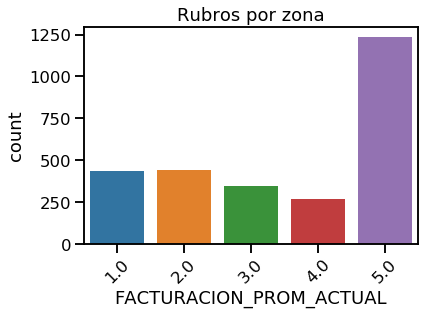

In [63]:
sns.set_context("talk")
az = sns.countplot(x="FACTURACION_PROM_ACTUAL", data=Rubros_1)
plt.xticks(rotation=45)
plt.title("Rubros por zona")
plt.show()

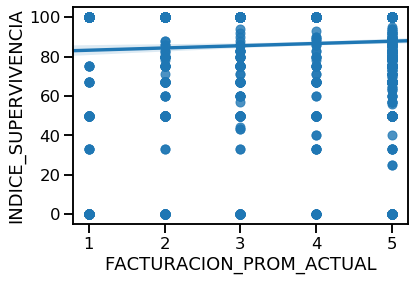

In [72]:
ax = sns.regplot(y='INDICE_SUPERVIVENCIA', x='FACTURACION_PROM_ACTUAL', data=Rubros_1)
plt.show()

In [73]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = Rubros_1.corr()
corr.sort_values(["FACTURACION_PROM_ACTUAL"], ascending = False, inplace = True)
print(corr.FACTURACION_PROM_ACTUAL)

Variables mas importantes con respecto a nuestro objetivo
FACTURACION_PROM_ACTUAL    1.000000
NIVEL_LOCALES              0.391911
INDICE_ESTABILIDAD         0.329109
SUP_MAS_5                  0.297745
INDICE_SUPERVIVENCIA       0.065792
MOC_ZONAS_ID               0.039722
MOC_RUBROS_ID              0.034348
NIVEL_RIESGO              -0.001666
SUP_ENTRE_4_Y_5           -0.020039
INDICE_CIERRE             -0.083037
SUP_ENTRE_2_Y_3           -0.101122
SUP_ENTRE_3_Y_4           -0.104229
SUP_MENOS_1               -0.125193
INDICE_CRECIMIENTO        -0.134525
INDICE_APERTURA           -0.161961
SUP_ENTRE_1_Y_2           -0.197736
Name: FACTURACION_PROM_ACTUAL, dtype: float64


In [74]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr.sort_values(["INDICE_ESTABILIDAD"], ascending = False, inplace = True)
print(np.corr.INDICE_ESTABILIDAD)

Variables mas importantes con respecto a nuestro objetivo
INDICE_ESTABILIDAD         1.000000
SUP_MAS_5                  0.595066
FACTURACION_PROM_ACTUAL    0.329109
NIVEL_LOCALES              0.220400
INDICE_SUPERVIVENCIA       0.089558
MOC_RUBROS_ID              0.039101
INDICE_CRECIMIENTO        -0.001369
MOC_ZONAS_ID              -0.005287
SUP_ENTRE_4_Y_5           -0.102941
SUP_MENOS_1               -0.179524
SUP_ENTRE_3_Y_4           -0.214088
SUP_ENTRE_2_Y_3           -0.256759
INDICE_APERTURA           -0.262896
NIVEL_RIESGO              -0.305893
SUP_ENTRE_1_Y_2           -0.323413
INDICE_CIERRE             -0.454641
Name: INDICE_ESTABILIDAD, dtype: float64


In [77]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = Rubros_1.corr()
corr.sort_values(["NIVEL_RIESGO"], ascending = False, inplace = True)
print(corr.NIVEL_RIESGO)

Variables mas importantes con respecto a nuestro objetivo
NIVEL_RIESGO               1.000000
INDICE_CIERRE              0.557793
NIVEL_LOCALES              0.145022
SUP_ENTRE_2_Y_3            0.108779
SUP_ENTRE_1_Y_2            0.037286
MOC_ZONAS_ID               0.023241
SUP_MENOS_1                0.017254
INDICE_APERTURA            0.001577
FACTURACION_PROM_ACTUAL   -0.001666
SUP_ENTRE_4_Y_5           -0.031189
SUP_MAS_5                 -0.036599
MOC_RUBROS_ID             -0.050725
SUP_ENTRE_3_Y_4           -0.069623
INDICE_CRECIMIENTO        -0.197379
INDICE_ESTABILIDAD        -0.305893
INDICE_SUPERVIVENCIA      -0.810293
Name: NIVEL_RIESGO, dtype: float64


In [78]:
np.max(Rubros_1)

MOC_RUBROS_ID                     2897
MOC_ZONAS_ID                       161
RUBRO                      VETERINARIA
NIVEL_RIESGO                         5
FACTURACION_PROM_ACTUAL              5
INDICE_CRECIMIENTO                   5
INDICE_ESTABILIDAD                   5
INDICE_APERTURA                    100
INDICE_CIERRE                      100
INDICE_SUPERVIVENCIA               100
SUP_MENOS_1                        100
SUP_ENTRE_1_Y_2                    100
SUP_ENTRE_2_Y_3                    100
SUP_ENTRE_3_Y_4                    100
SUP_ENTRE_4_Y_5                    100
SUP_MAS_5                          100
NIVEL_LOCALES                        5
dtype: object

In [80]:
Demografia_1 = Demografia.drop(['RANGO_ETARIO', 'GENERO'], axis=1)

In [81]:
np.max(Demografia_1)

MOC_DEMOGRAFIA_ID        2254
MOC_ZONAS_ID              161
PK_RANGO_ETARIO_ID          6
PK_GENERO_ID                1
POBLACION_VIVIENTE       6989
POBLACION_TRABAJADORA    3327
dtype: int64

In [2]:
Rubros.describe()

NameError: name 'Rubros' is not defined